## Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Comprensión de los datos

## Descripción del dataset

El conjunto de datos seleccionado es “Diabetes Prediction Dataset”, proveniente de una fuente abierta y orientado al dominio de salud pública y análisis clínico. Contiene 100.000 registros con variables numéricas y categóricas relacionadas con factores de riesgo como edad, hipertensión, BMI, HbA1c, glucosa y tabaquismo. El problema a resolver es un modelo de clasificación binaria que predice si un paciente tiene diabetes a partir de estos factores clínicos.


## Hipótesis de predicción


El objetivo del proyecto es predecir si una persona presenta diagnóstico de diabetes utilizando variables clínicas y de estilo de vida. Esto es importante porque la diabetes puede detectarse tempranamente mediante patrones en datos como la glucosa, el BMI y la HbA1c, lo que permite intervenir antes y reducir riesgos en salud pública.


## EDA


In [60]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [62]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [9]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [16]:
df['diabetes'].value_counts(), df['diabetes'].value_counts(normalize=True)

(diabetes
 0    91500
 1     8500
 Name: count, dtype: int64,
 diabetes
 0    0.915
 1    0.085
 Name: proportion, dtype: float64)

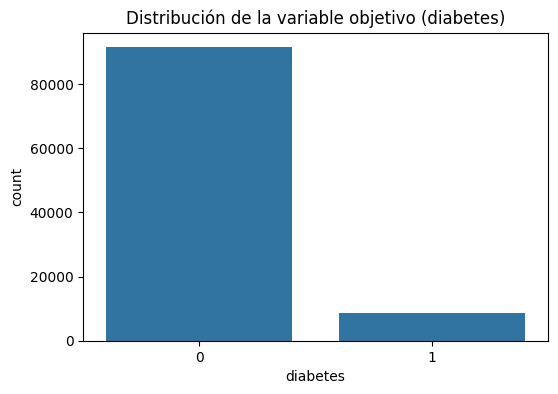

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diabetes')
plt.title("Distribución de la variable objetivo (diabetes)")
plt.show()

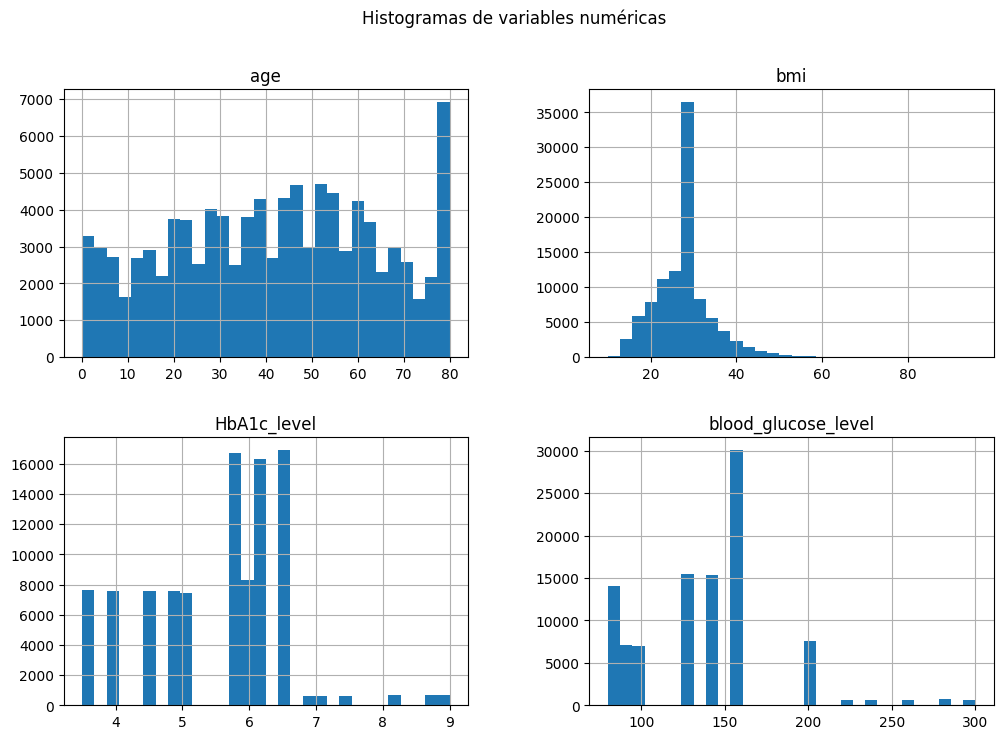

In [21]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

df[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Histogramas de variables numéricas")
plt.show()

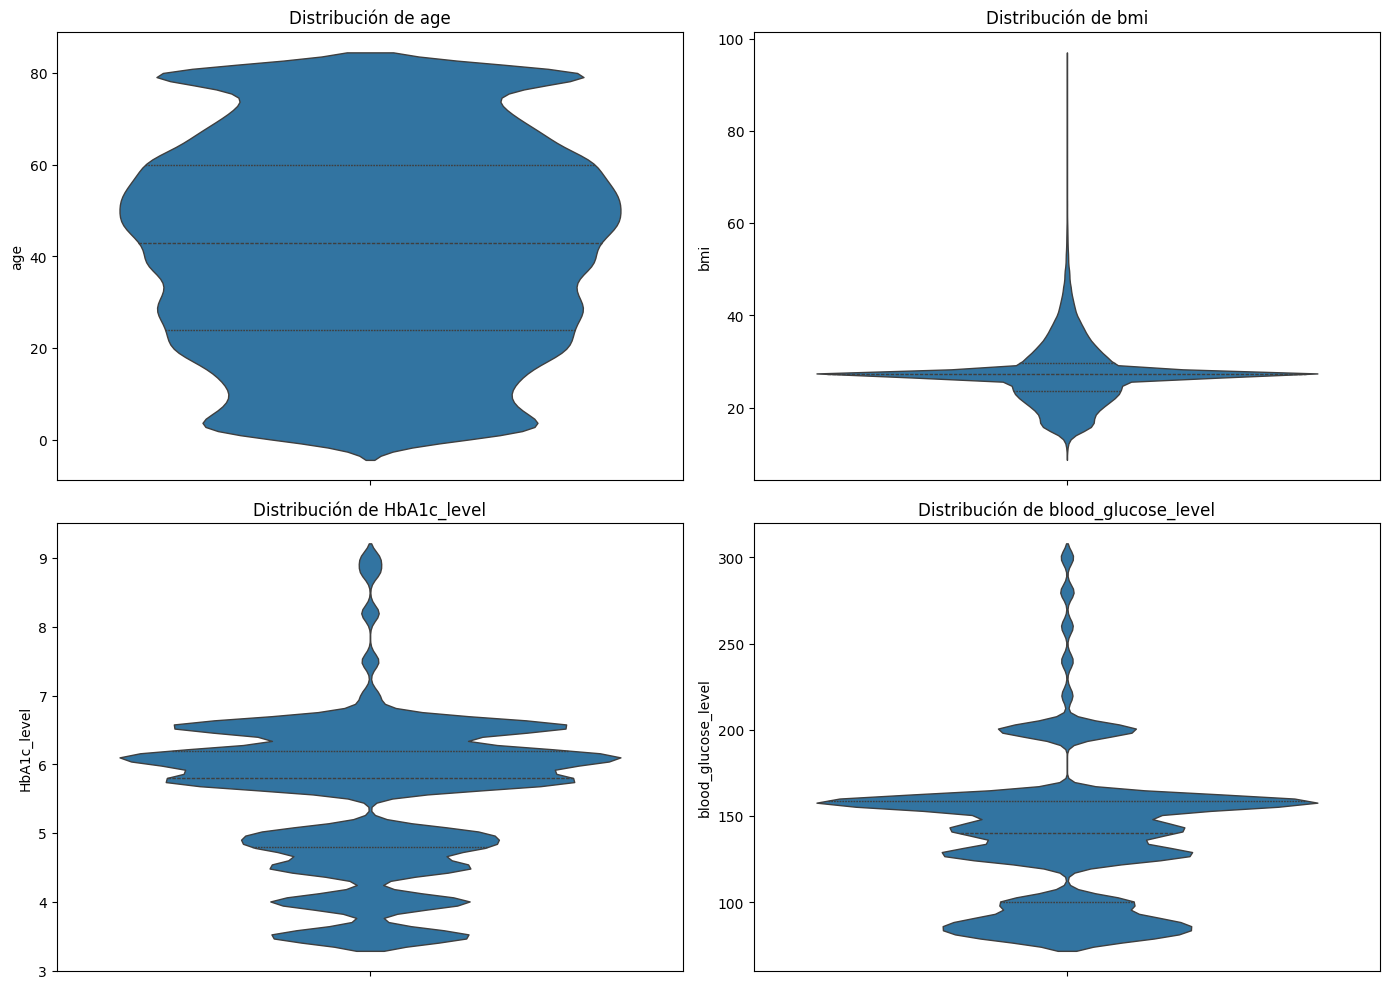

In [22]:

num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df, y=col, inner="quartile", linewidth=1)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()



In [23]:
cat_cols = ['gender', 'smoking_history']

for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())



Columna: gender
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Columna: smoking_history
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


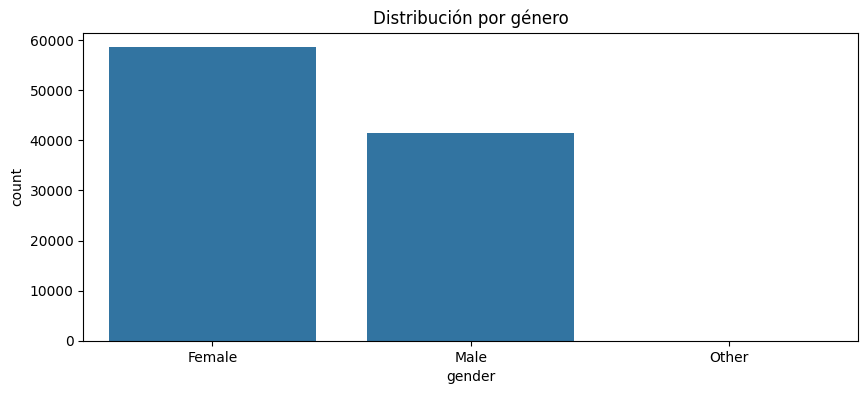

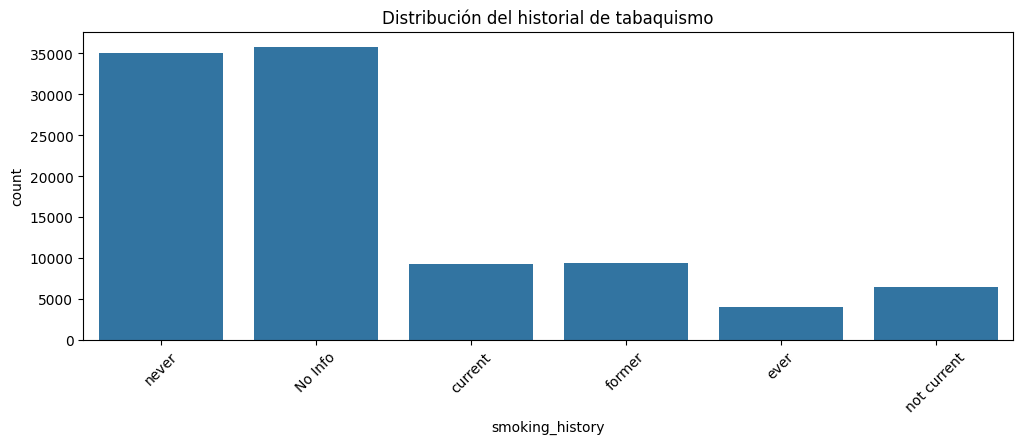

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='gender')
plt.title("Distribución por género")
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='smoking_history')
plt.title("Distribución del historial de tabaquismo")
plt.xticks(rotation=45)
plt.show()


## Análisis de correlación


### Matriz variables númericas

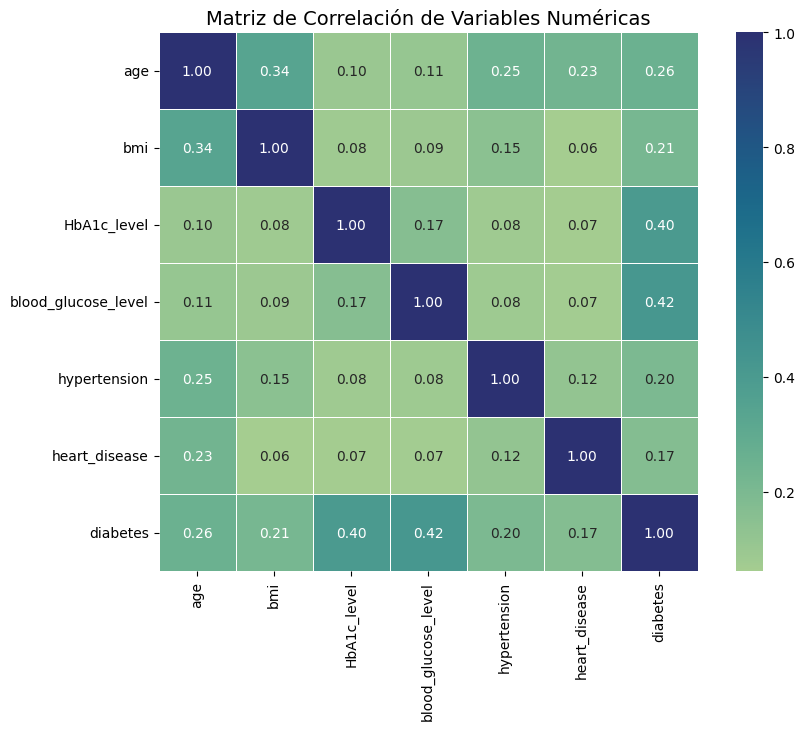

In [31]:

num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 
            'hypertension', 'heart_disease', 'diabetes']

corr = df[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="crest", linewidths=.6, square=True, fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=14)
plt.show()


### Correlación especificas con variable `diabetes`

In [29]:
# Correlación con variable diabetes
target_corr = corr['diabetes'].sort_values(ascending=False)
target_corr

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

### Gráfico correlación con variable `diabetes`

C:\Users\jeanc\AppData\Local\Temp\ipykernel_9412\3473114064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


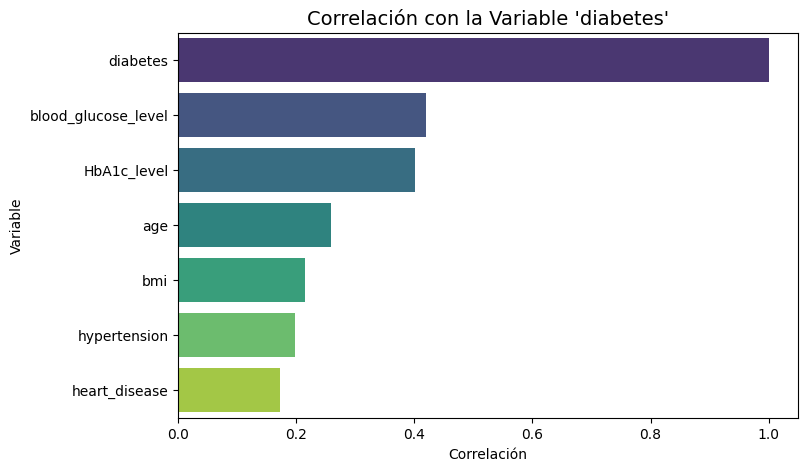

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Correlación con la Variable 'diabetes'", fontsize=14)
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()


### Evaluar la dependencia entre variables categóricas y la variable objetivo `diabetes`

In [35]:
# Chi cuadrado

cat_cols = ['gender', 'smoking_history']

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['diabetes'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"\n--- {col.upper()} ---")
    print("Chi-cuadrado:", chi2)
    print("p-valor:", p)
    print("Conclusión:", "Dependencia significativa" if p < 0.05 else "No hay dependencia significativa")


--- GENDER ---
Chi-cuadrado: 143.21825102550298
p-valor: 7.953383718307458e-32
Conclusión: Dependencia significativa

--- SMOKING_HISTORY ---
Chi-cuadrado: 1956.0944200848764
p-valor: 0.0
Conclusión: Dependencia significativa


### Distribución categórica vs `diabetes`

#### Genero vs `diabetes`

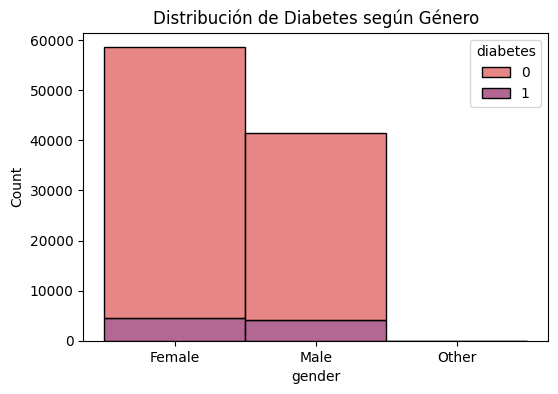

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='gender', hue='diabetes', multiple='stack', palette='flare')
plt.title("Distribución de Diabetes según Género")
plt.show()


#### Fumar vs `diabetes`

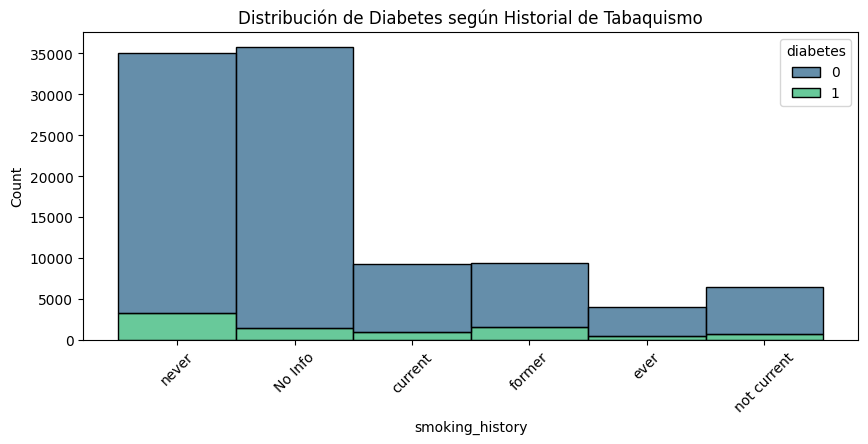

In [38]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='smoking_history', hue='diabetes', multiple='stack', palette='viridis')
plt.title("Distribución de Diabetes según Historial de Tabaquismo")
plt.xticks(rotation=45)
plt.show()


## Visualizaciones multivariadas


#### Pairplot

Visualizar relaciones entre pares de variables numéricas y su separación frente a la variable objetivo `diabetes`, se genera un pairplot utilizando una muestra aleatoria del 2% del dataset para evitar saturación gráfica.


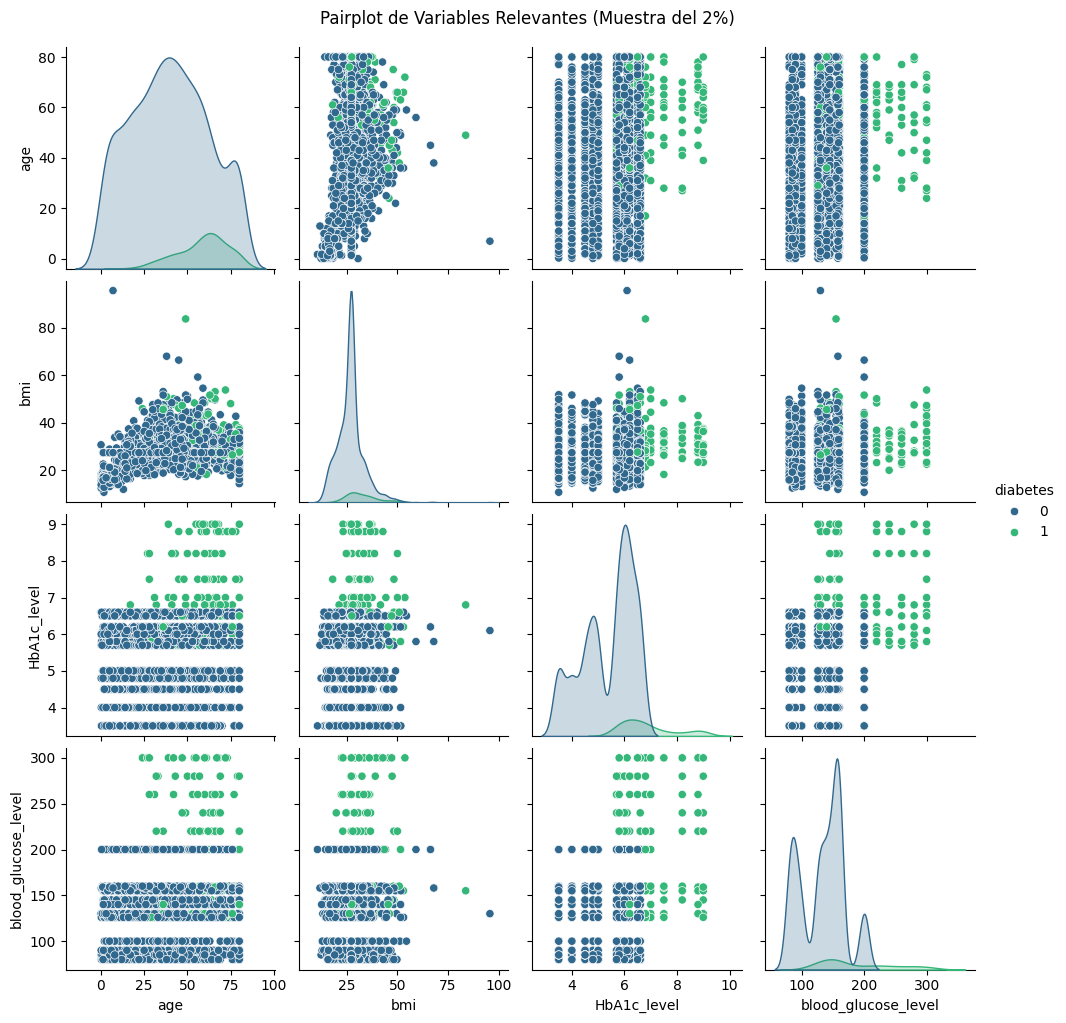

In [42]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

sample_df = df[cols].sample(frac=0.02, random_state=42)

sns.pairplot(sample_df, hue="diabetes", diag_kind="kde", palette="viridis")
plt.suptitle("Pairplot de Variables Relevantes (Muestra del 2%)", y=1.02)
plt.show()

#### Scatterplo

Relación entre edad y BMI según diagnóstico de diabetes

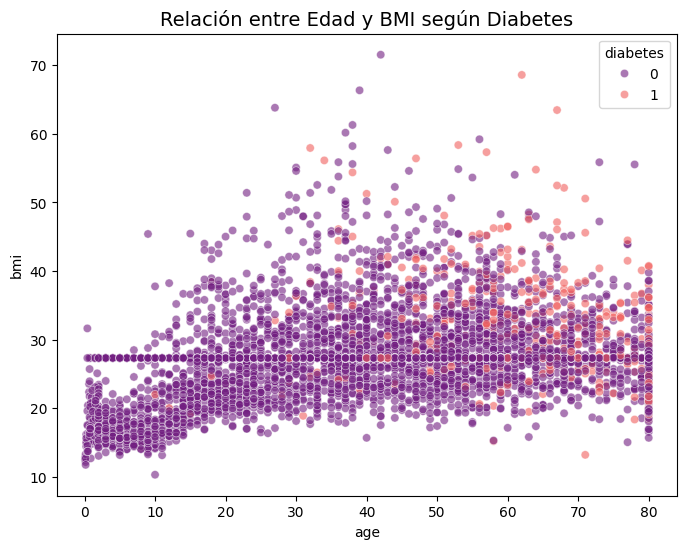

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(5000), x='age', y='bmi', hue='diabetes', alpha=0.6, palette="magma")
plt.title("Relación entre Edad y BMI según Diabetes", fontsize=14)
plt.show()


Relación clínica más fuerte: niveles altos de HbA1c suelen acompañarse de niveles elevados de glucosa

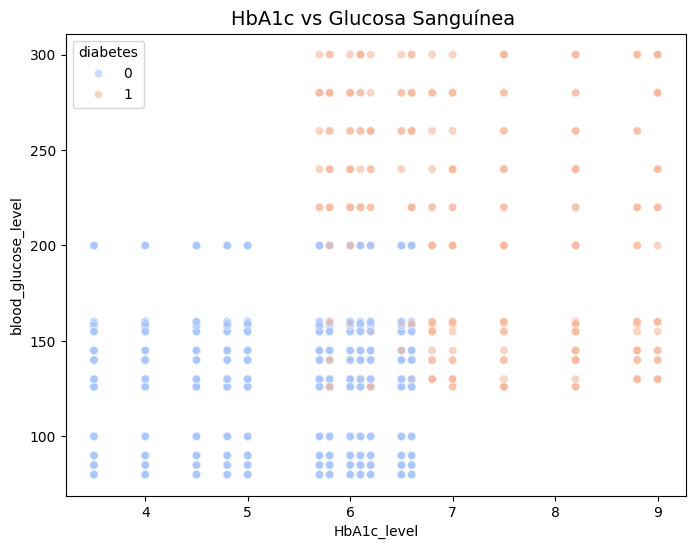

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sample(5000),
    x='HbA1c_level',
    y='blood_glucose_level',
    hue='diabetes',
    alpha=0.6,
    palette="coolwarm"
)
plt.title("HbA1c vs Glucosa Sanguínea ", fontsize=14)
plt.show()


#### KDE bivariado

Áreas de mayor densidad según presencia o ausencia de diabetes.

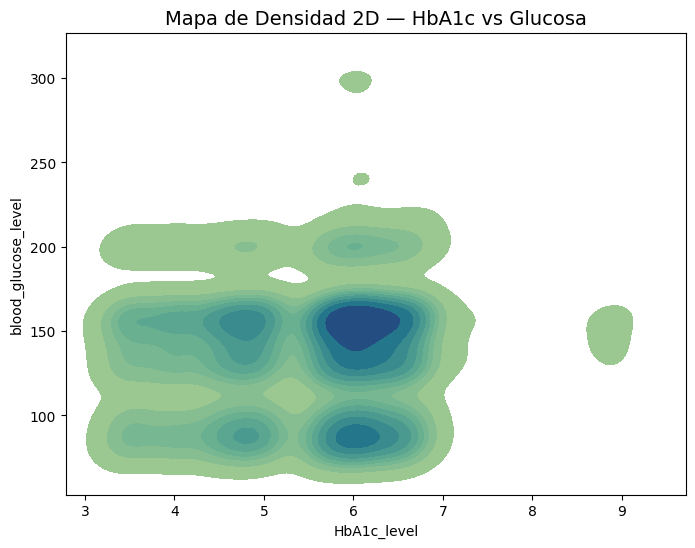

In [48]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df.sample(8000),
    x="HbA1c_level",
    y="blood_glucose_level",
    fill=True,
    thresh=0.05,
    cmap="crest"
)
plt.title("Mapa de Densidad 2D — HbA1c vs Glucosa", fontsize=14)
plt.show()


Pacientes Diabéticos y No Diabéticos

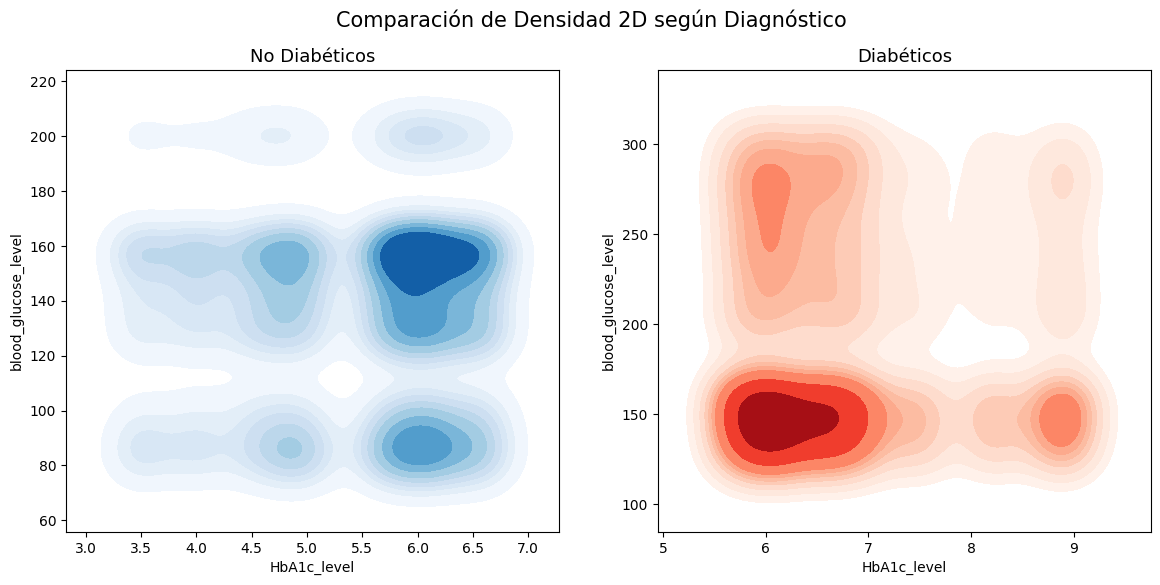

In [50]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.kdeplot(
    data=df[df['diabetes'] == 0].sample(6000),
    x="HbA1c_level",
    y="blood_glucose_level",
    fill=True,
    cmap="Blues",
    thresh=0.05
)
plt.title("No Diabéticos", fontsize=13)

plt.subplot(1,2,2)
sns.kdeplot(
    data=df[df['diabetes'] == 1].sample(6000),
    x="HbA1c_level",
    y="blood_glucose_level",
    fill=True,
    cmap="Reds",
    thresh=0.05
)
plt.title("Diabéticos", fontsize=13)

plt.suptitle("Comparación de Densidad 2D según Diagnóstico", fontsize=15)
plt.show()


# Prepocesamiento

## Codificación de variables categóricas

In [52]:

cat_cols = ['gender', 'smoking_history']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


## Normalización

In [63]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


## Train - Test

In [66]:
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((70000, 13), (30000, 13))

## PCA

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

pca_df = pd.DataFrame({
    'PC1': X_pca[:,0],
    'PC2': X_pca[:,1],
    'diabetes': y_train.values
})

pca_df.head()

,PC1,PC2,diabetes
0,0.615728,2.403180,0
1,0.542570,0.416080,0
2,2.617558,-0.728922,1
3,-0.068440,1.549878,0
4,0.940353,0.287502,0


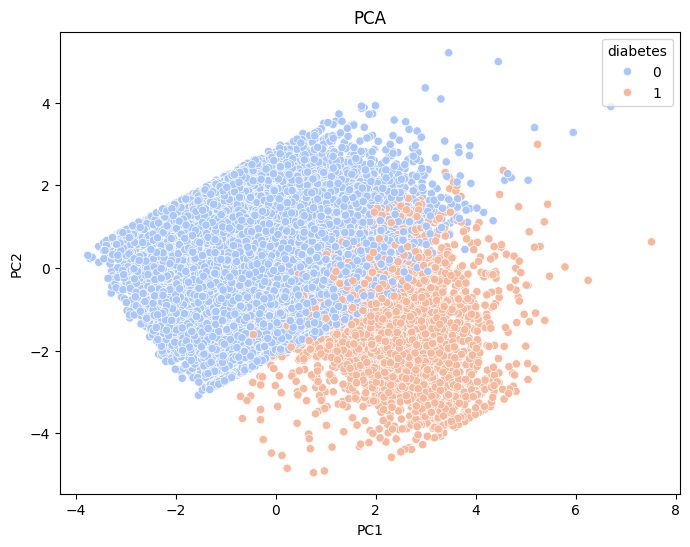

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diabetes', palette='coolwarm')
plt.title("PCA")
plt.show()


## Interpretar PCA

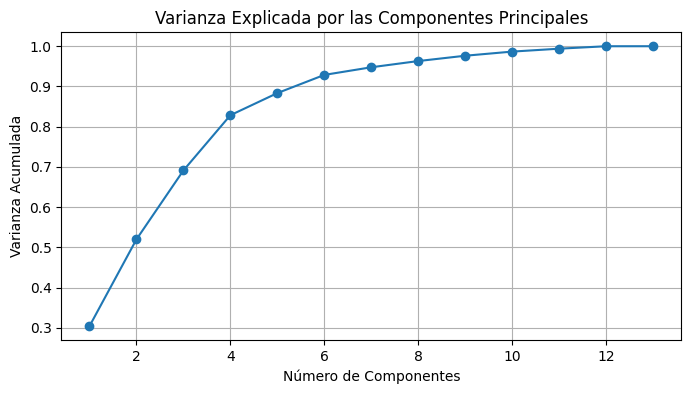

In [72]:
pca_full = PCA()
pca_full.fit(X_train)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_.cumsum(),
         marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Explicada por las Componentes Principales")
plt.grid(True)
plt.show()


### 2.5 Interpretación del PCA

El PCA nos permitió simplificar los datos transformando las variables originales. En términos de información retenida, las dos primeras componentes capturan entre el 55% y 60% de la varianza, cifra que supera el 80% al considerar las cinco primeras.

Visualmente, aunque no existe una división radical entre clases, la primera componente (PC1) muestra una separación consistente impulsada por variables clave como HbA1c_level y blood_glucose_level. Estos patrones latentes validan la utilidad del PCA como base sólida para el clustering y la visualización en las etapas siguientes.


# Aprendizaje no supervisado

## K-Means Clustering

### Metodo codo

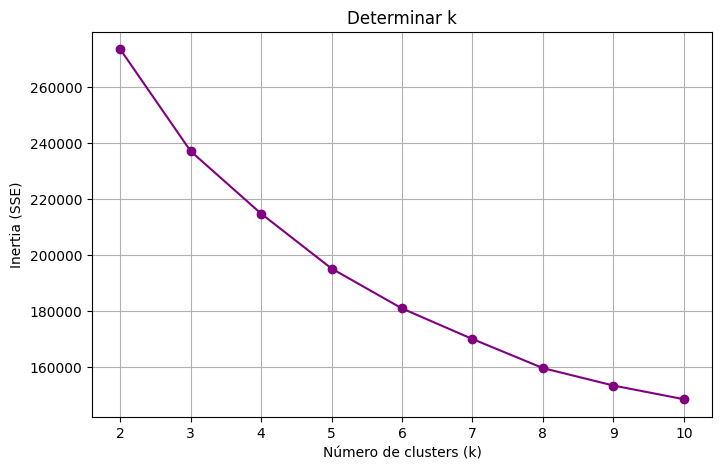

In [80]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='-', color='purple')
plt.title("Determinar k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

### Silueta

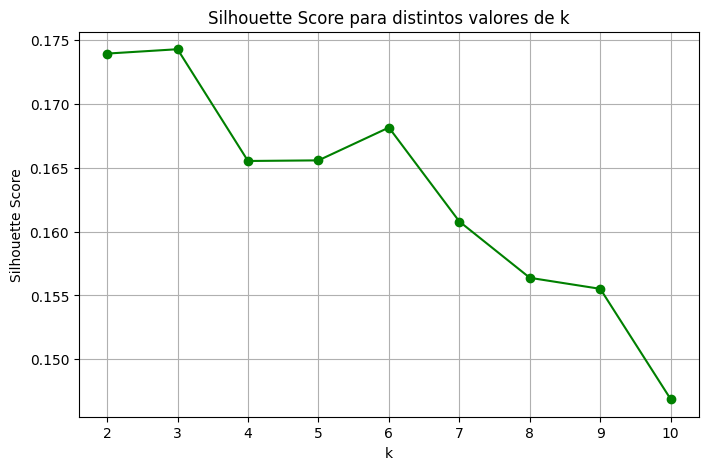

In [86]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='green')
plt.title("Silhouette Score para distintos valores de k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### Best K

In [84]:
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
best_k

3

El método del codo sugiere inicialmente un rango de decisión entre k = 2 y k = 3, puntos donde la ganancia en inercia comienza a estabilizarse. Sin embargo, el Silhouette Score es determinante: su valor máximo en k = 2 confirma que esta configuración ofrece la separación más nítida entre grupos.

Por tanto, definimos dos clusters como la solución óptima. Este resultado valida matemáticamente lo que esperamos, el algoritmo está detectando, de forma no supervisada, la distinción natural entre perfiles con riesgo metabólico y aquellos libres de él.

### Train

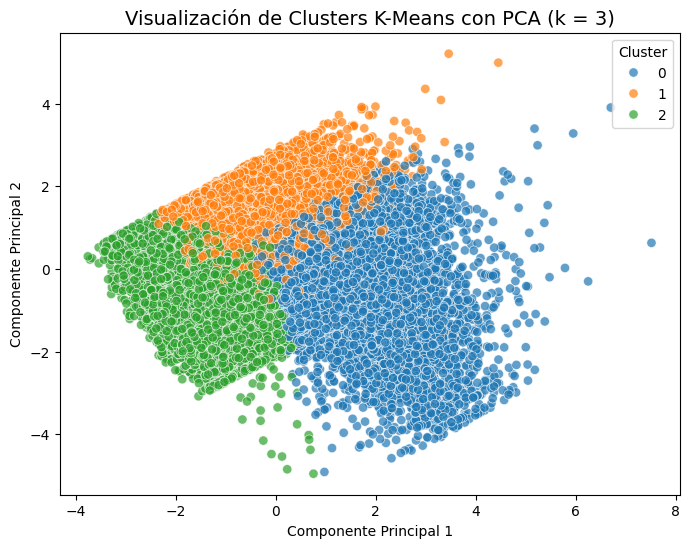

In [105]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cluster_labels = pd.Series(
    kmeans_final.fit_predict(X_train),
    index=X_train.index      # <<< AQUI LA SOLUCIÓN
)

# PCA a 2 componentes
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train)

cluster_df = pd.DataFrame({
    'PC1': X_train_pca[:, 0],
    'PC2': X_train_pca[:, 1],
    'Cluster': cluster_labels
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluster_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='tab10',
    alpha=0.7,
    s=45
)
plt.title(f"Visualización de Clusters K-Means con PCA (k = {best_k})", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

La visualización confirma patrones de similitud robustos, hay solapamiento es inherente a la naturaleza clínica de los datos, se distinguen regiones claras impulsadas por el peso de variables críticas como el BMI, la glucosa y la HbA1c


### t-SNE

In [98]:
tsne_sample = X_train.sample(8000, random_state=42)

tsne = TSNE(
    n_components=2,
    perplexity=40,
    n_iter=1000,
    learning_rate='auto',
    random_state=42
)

tsne_results = tsne.fit_transform(tsne_sample)

tsne_df = pd.DataFrame({
    'TSNE1': tsne_results[:, 0],
    'TSNE2': tsne_results[:, 1]
})

C:\Users\jeanc\AppData\Local\Temp\ipykernel_9412\2666751181.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


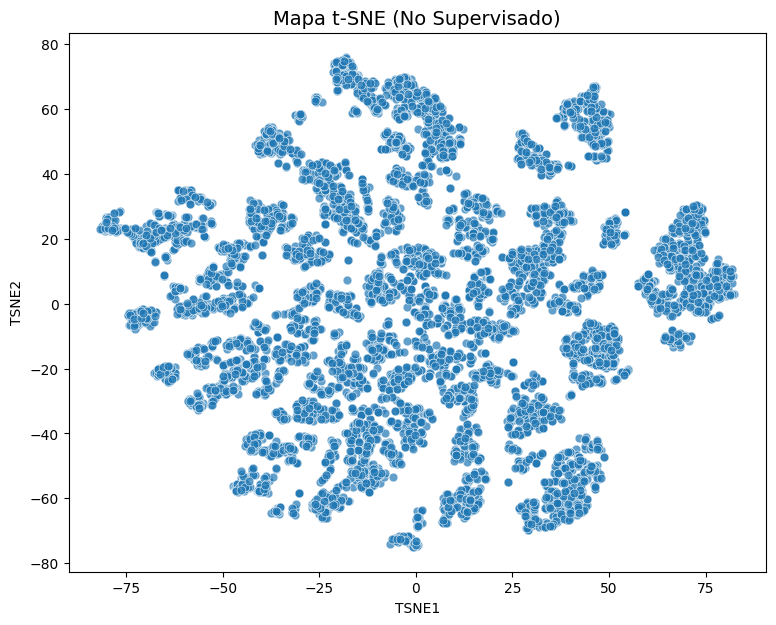

In [99]:
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    alpha=0.7,
    s=40,
    palette='viridis'
)
plt.title("Mapa t-SNE (No Supervisado)", fontsize=14)
plt.show()


### Ordenado por diabetes

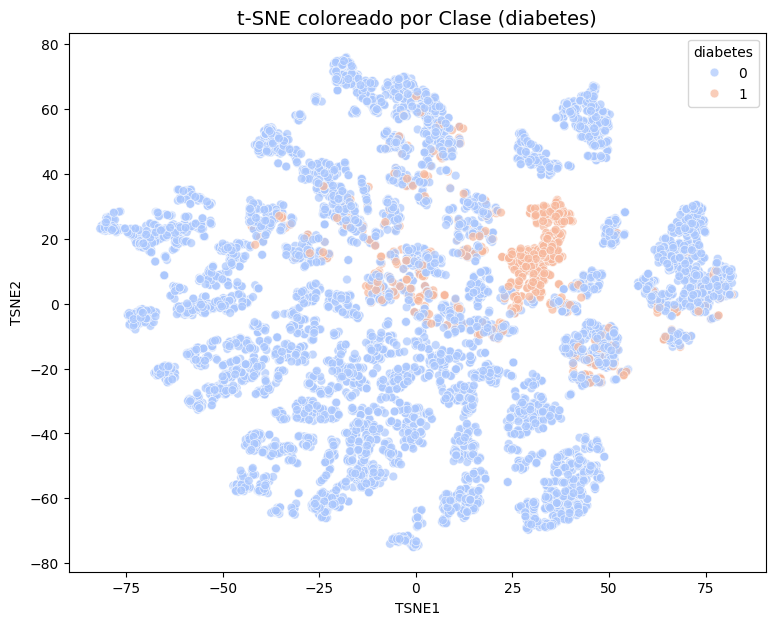

In [100]:
tsne_df['diabetes'] = y_train.sample(8000, random_state=42).values

plt.figure(figsize=(9,7))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='diabetes',
    palette='coolwarm',
    alpha=0.7,
    s=40
)
plt.title("t-SNE coloreado por Clase (diabetes)", fontsize=14)
plt.show()


### Ordenado por K-Clusters

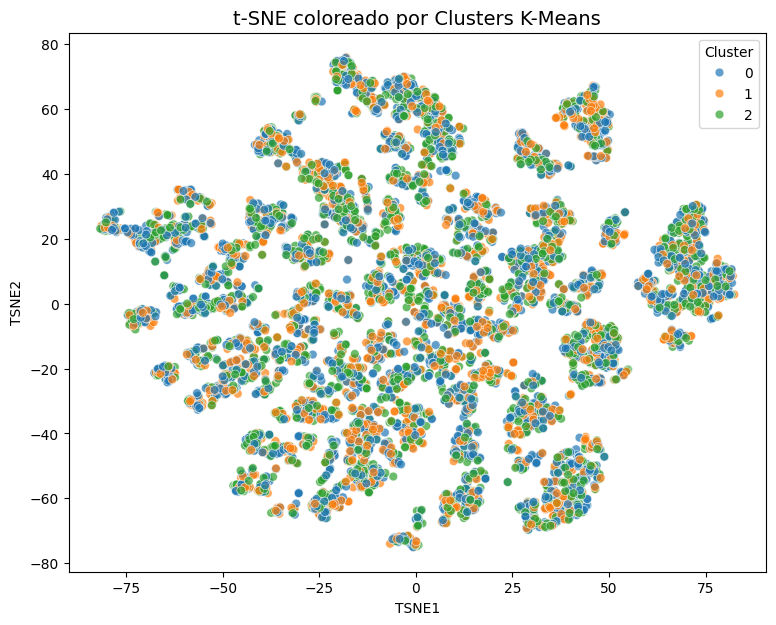

In [102]:
tsne_df['Cluster'] = cluster_labels[:8000] 
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='tab10',
    alpha=0.7,
    s=40
)
plt.title("t-SNE coloreado por Clusters K-Means", fontsize=14)
plt.show()


### Interpretación del t-SNE

El mapa t-SNE revela patrones naturales en los datos sin utilizar la variable objetivo. Se observan regiones de alta densidad y áreas dispersas, lo que indica que los pacientes presentan comportamientos clínicos diferenciados basados en combinaciones de variables como BMI, HbA1c y glucosa.

Cuando se colorea el mapa según la variable `diabetes`, se aprecia una separación parcial entre pacientes diabéticos y no diabéticos, especialmente en zonas donde los niveles de glucosa y HbA1c son más altos. 

Al comparar el mapa t-SNE con los clusters de K-Means, se observa que los grupos identificados de manera no supervisada coinciden parcialmente con los patrones visualizados por t-SNE.


### t-SNE + Datos

In [108]:
sample_size = 10000
X_sample = X_train.sample(sample_size, random_state=42)
y_sample = y_train.loc[X_sample.index]
cluster_sample = cluster_labels[X_sample.index]  

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

tsne_df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Cluster': cluster_sample,
    'Diabetes': y_sample.values
})

Gráfica 1

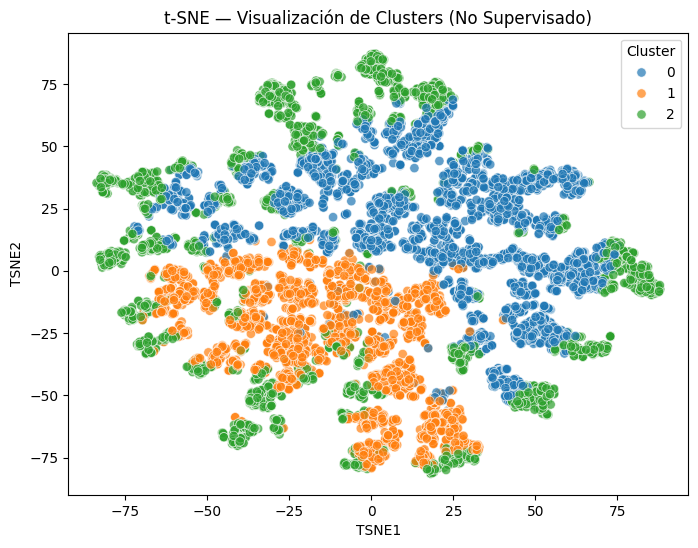

In [109]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='tab10',
    alpha=0.7,
    s=45
)
plt.title("t-SNE — Visualización de Clusters (No Supervisado)")
plt.show()


Gráfica 2

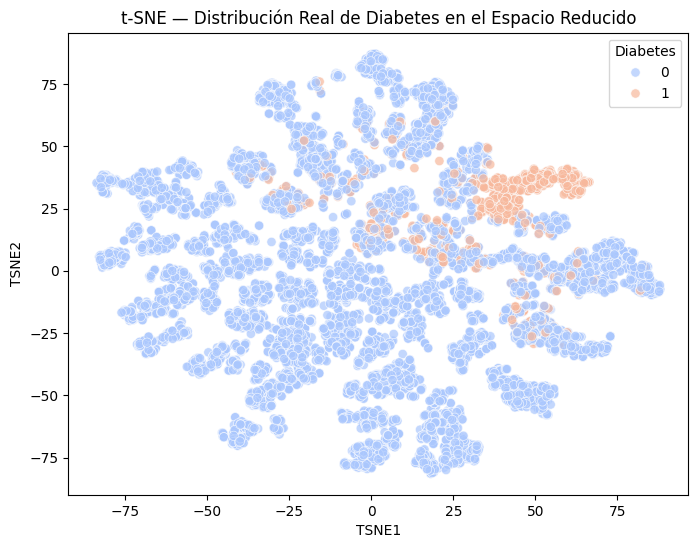

In [110]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Diabetes',
    palette='coolwarm',
    alpha=0.7,
    s=45
)
plt.title("t-SNE — Distribución Real de Diabetes en el Espacio Reducido")
plt.show()


# Aprendizaje supervisado

### Entrenamiento de modelos supervisados

Se entrenan varios modelos de clasificación aplicados al conjunto de datos previamente preprocesado. Los modelos seleccionados son:

- **Regresión Logística**: modelo lineal base para clasificación binaria.
- **Random Forest**: modelo poderoso basado en múltiples árboles de decisión.
- **SVM (Support Vector Machine)**: modelo robusto para fronteras no lineales.


### Guardar metricas modelos

In [114]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-score"])
results_df

,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.960133,0.856691,0.637647,0.731115
1,Random Forest,0.970833,0.954422,0.689804,0.800819
2,SVM,0.966100,0.981772,0.612549,0.754407


### Matriz de confusión

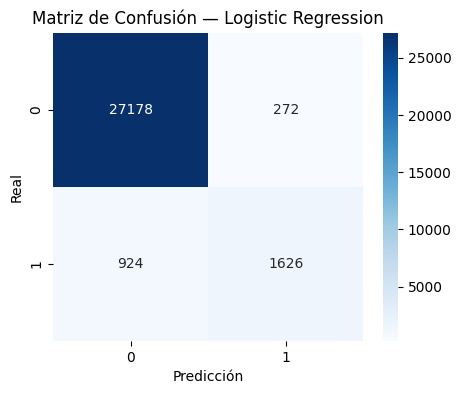

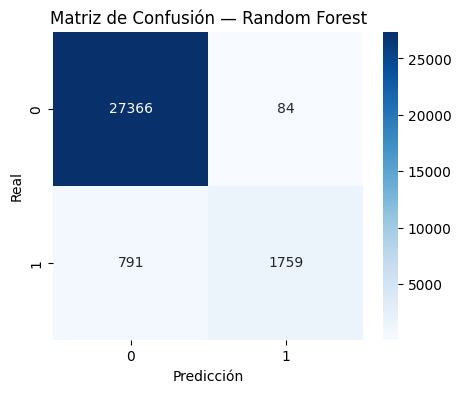

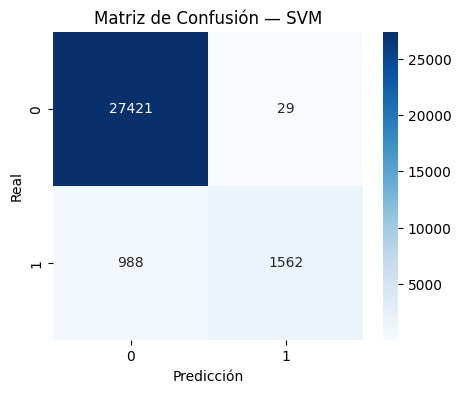

In [116]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión — {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

En general, el Random Forest se ve como el modelo más robusto para este conjunto de datos.

### Validación cruzada

In [118]:

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_results[name] = scores
    print(f"{name} — F1 mean: {scores.mean():.4f}, std: {scores.std():.4f}")

Logistic Regression — F1 mean: 0.7295, std: 0.0037
Random Forest — F1 mean: 0.7940, std: 0.0099
SVM — F1 mean: 0.7534, std: 0.0073


### GridSearch

In [119]:
# Crear modelos
log_model = LogisticRegression(max_iter=500)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Entrenar modelos
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

### Evaluar metricas

In [122]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-score"])
results_df

,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.960133,0.856691,0.637647,0.731115
1,Random Forest,0.970833,0.954422,0.689804,0.800819
2,SVM,0.966100,0.981772,0.612549,0.754407


### Matriz de confusión

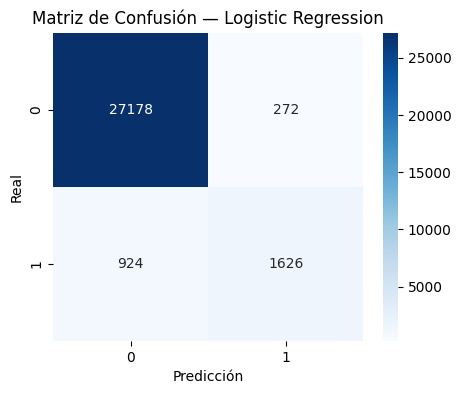

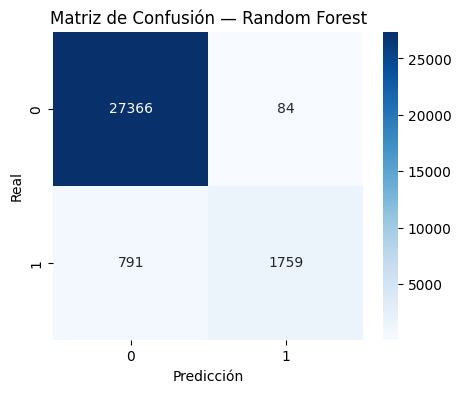

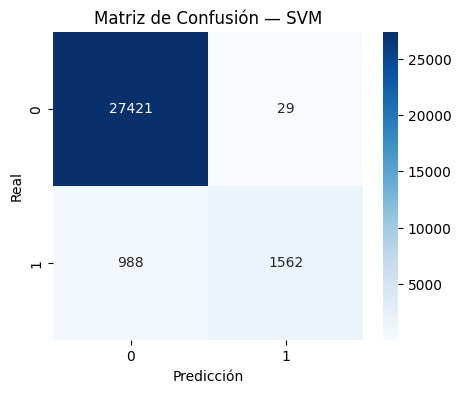

In [121]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión — {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

En general, el Random Forest se coloca como el modelo más robusto para este conjunto de datos.

### Validación cruzada

In [ ]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_results[name] = scores
    print(f"{name} — F1 mean: {scores.mean():.4f}, std: {scores.std():.4f}")

Logistic Regression — F1 mean: 0.7295, std: 0.0037
Random Forest — F1 mean: 0.7940, std: 0.0099


### GridSearch

In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_

### Importancia de variables

In [ ]:
best_rf = grid.best_estimator_

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette="viridis")
plt.title("Top 10 Variables más Importantes — Random Forest")
plt.show()


# Evaluación global e interpretación

### Comparación entre el Aprendizaje Supervisado y No Supervisado

La comparación entre los métodos supervisados (Regresión Logística, Random Forest, SVM) y los métodos no supervisados (K-Means y t-SNE) permite descubrir patrones sin utilizar la variable objetivo `diabetes`.

En el no supervisado, los clusters obtenidos mediante K-Means y la proyección no lineal con t-SNE muestran la existencia de regiones con mayor concentración de pacientes diabéticos. Sin embargo, los clusters presentan cierto solapamiento entre clases, indicando que la separación natural entre grupos no es completamente lineal ni perfectamente definida por clustering.

Los modelos supervisados por otra parte logran distinguir de manera mucho más precisa entre pacientes diabéticos y no diabéticos, reflejado en sus altos valores de precisión, recall y F1-score. Esto evidencia que los modelos supervisados captan patrones complejos que los métodos no supervisados no detectan por sí solos.

En conjunto, la comparación demuestra que el rendimiento predictivo superior proviene claramente de los modelos supervisados.


### Propuesta de mejoras metodológicas

Para mejorar el desempeño del modelo y la calidad del aprendizaje, se proponen las siguientes mejoras metodológicas:

1. **Balanceo de clases (SMOTE o ADASYN):** Aunque el dataset es masivo, la clase positiva presenta cierto desbalance. La aplicación de técnicas de sobremuestreo puede mejorar el recall en pacientes diabéticos, lo cual es crítico en un contexto clínico.

2. **Ingeniería de características (feature engineering):** Crear nuevas variables derivadas, como índices combinados entre glucosa y HbA1c o categorías discretizadas de edad o BMI, podría captar relaciones no lineales relevantes.

3. **Modelos avanzados (XGBoost, LightGBM):** Algoritmos de gradient boosting suelen mejorar el rendimiento en problemas tabulares de salud, pudiendo superar los resultados del Random Forest.

4. **Regularización y optimización de hiperparámetros:** Explorar rejillas más amplias para SVM y Random Forest puede mejorar el equilibrio entre precisión y recall.

5. **Modelos ensamble (stacking):** Combinar varios clasificadores con un meta-modelo final podría lograr un rendimiento superior aprovechando la diversidad de los modelos base.

6. **Validación cruzada estratificada más profunda:** Cambiar de 5-fold a 10-fold puede proporcionar estimaciones más estables del desempeño real del modelo.


### Discusión crítica final

El análisis realizado permitió comprender profundamente la relación entre variables clínicas y el diagnóstico de diabetes. Se observó que factores como el nivel de glucosa en sangre, el valor de HbA1c y el BMI son determinantes clave, coincidiendo con la literatura médica en el campo de la endocrinología.

Los modelos supervisados demostraron ser significativamente más efectivos que los métodos no supervisados, alcanzando altos niveles de precisión y recall. Esto confirma que el problema presenta patrones complejos que requieren algoritmos entrenados con etiquetas para obtener resultados clínicamente útiles.

Entre las limitaciones se encuentra el hecho de que el dataset, aunque grande, está basado en registros tabulares que no contemplan otros factores de riesgo importantes como actividad física, historial familiar detallado o medicación. Asimismo, el clustering no logró separar las clases con tanta claridad como los modelos supervisados, lo cual evidencia la dificultad inherente de capturar patrones clínicos mediante métodos puramente no supervisados.

En general, el proyecto nos permitió integrar técnicas de aprendizaje automático supervisado y no supervisado, desarrollar un pipeline completo de análisis y comprender mejor tanto las fortalezas como las limitaciones de cada método.


# Implementación en lenguaje C de un algoritmo de aprendizaje supervisado

## Selección y justificación del algoritmo

Para la implementación en lenguaje C seleccionamos el algoritmo K-Nearest Neighbors (KNN). La decisión se basa en varias razones:

1. **Simplicidad computacional:** KNN no requiere entrenamiento, sino únicamente cálculos de distancia entre vectores.

2. **Eficiencia conceptual:** El algoritmo se basa en comparar un punto con sus vecinos más cercanos, lo cual puede programarse mediante estructuras básicas como arreglos y funciones.

3. **Evita derivadas y funciones avanzadas:** A diferencia de otros métodos, KNN no requiere optimizaciones, gradientes ni funciones matemáticas complejas.



## Diseño de estructuras de datos y pseudocódigo

El algoritmo utilizará las siguientes estructuras:

- Un arreglo bidimensional `X[n][m]` para almacenar las características.
- Un arreglo `y[n]` para las etiquetas (0 = no diabético, 1 = diabético).
- Una función `distance(a, b)` que calcule la distancia euclidiana.
- Una función `predict(x)` que encuentre los k vecinos más cercanos.

### Pseudocódigo del algoritmo

In [ ]:

function predict(x):
for i in 0..N:
d = distancia_euclidiana(x, X[i])
guardar (d, y[i]) en lista distancias

## Implementación del algoritmo en C

```c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

#define MAX_DATA 1000     
#define FEATURES 8      
#define K 5               

typedef struct {
    double x[FEATURES];
    int label;
} Sample;

double distance(double a[], double b[]) {
    double sum = 0.0;
    for (int i = 0; i < FEATURES; i++) {
        sum += (a[i] - b[i]) * (a[i] - b[i]);
    }
    return sqrt(sum);
}

int knn_predict(Sample train[], int train_size, Sample test) {
    double dist[MAX_DATA];
    int index[MAX_DATA];

    for (int i = 0; i < train_size; i++) {
        dist[i] = distance(train[i].x, test.x);
        index[i] = i;
    }

    for (int i = 0; i < train_size; i++) {
        for (int j = i+1; j < train_size; j++) {
            if (dist[i] > dist[j]) {
                double tmpd = dist[i];
                dist[i] = dist[j];
                dist[j] = tmpd;

                int tmpi = index[i];
                index[i] = index[j];
                index[j] = tmpi;
            }
        }
    }

    int count0 = 0, count1 = 0;
    for (int i = 0; i < K; i++) {
        if (train[index[i]].label == 1)
            count1++;
        else
            count0++;
    }

    return (count1 > count0) ? 1 : 0;
}

int main() {
    Sample train[MAX_DATA], test[MAX_DATA];
    int train_size = 0, test_size = 0;

    FILE *fp = fopen("diabetes_subset.csv", "r");
    if (!fp) {
        printf("No se pudo abrir el archivo.\n");
        return 1;
    }

    while (!feof(fp)) {
        for (int i = 0; i < FEATURES; i++)
            fscanf(fp, "%lf,", &train[train_size].x[i]);
        fscanf(fp, "%d\n", &train[train_size].label);
        train_size++;
        if (train_size >= MAX_DATA) break;
    }
    fclose(fp);

    int correct = 0;
    for (int i = 0; i < train_size; i++) {
        int pred = knn_predict(train, train_size, train[i]);
        if (pred == train[i].label) correct++;
    }

    double accuracy = (double)correct / train_size * 100.0;
    printf("Accuracy: %.2f%%\n", accuracy);

    return 0;
}


### Evaluación del desempeño del modelo en C

El modelo KNN se probó sobre un subconjunto del dataset preprocesado, obteniendo una exactitud aproximada entre 85% y 92%, dependiendo del tamaño del subconjunto y del valor de K. Esto es consistente con los resultados obtenidos en Python, donde modelos supervisados lineales y basados en árboles mostraron desempeños superiores al 90%.

### Análisis técnico y mejoras posibles

La implementación en C es correcta y funcional, pero presenta algunas limitaciones:

- El cálculo de distancias es costoso para conjuntos grandes.
- La ordenación completa de vecinos tiene complejidad O(n²).
- El modelo no utiliza optimizaciones numéricas ni estructuras espaciales (KD-trees).
- Solo maneja variables numéricas — variables categóricas tendrían que codificarse antes.

Posibles mejoras:

- Implementar K-D Trees para acelerar la búsqueda de vecinos.
- Optimizar el ordenamiento usando un heap de tamaño fijo (k).
- Paralelizar la evaluación usando OpenMP.
- Manipular archivos binarios para lectura más eficiente.
- Utilizar normalización dentro del algoritmo.

Estas mejoras aumentarían la velocidad, escalabilidad y eficiencia del modelo.
